![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading data set file which is a CSV file using pandas Library
netflix_df = pd.read_csv("netflix_data.csv")

In [3]:
print(netflix_df.head(5))

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

In [4]:
# Check for null values
print("Null values per column:\n", netflix_df.isnull().sum())

Null values per column:
 show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64


In [5]:
# Examine potential outliers
print("\nSummary statistics:\n", netflix_df.describe())


Summary statistics:
        release_year     duration
count   7787.000000  7787.000000
mean    2013.932580    69.122769
std        8.757395    50.950743
min     1925.000000     1.000000
25%     2013.000000     2.000000
50%     2017.000000    88.000000
75%     2018.000000   106.000000
max     2021.000000   312.000000


In [6]:
# Cleaning the data by subseting only the type "Movie"
netflix_subset = netflix_df[netflix_df["type"]=="Movie"]

In [7]:
netflix_subset

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


In [8]:
# Selecting only the important columns by again subseting "netflix_subset"
netflix_movies = netflix_subset.loc[:,["title","country","genre","release_year","duration"]]

In [9]:
netflix_movies

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95
...,...,...,...,...,...
7781,Zoom,United States,Children,2006,88
7782,Zozo,Sweden,Dramas,2005,99
7783,Zubaan,India,Dramas,2015,111
7784,Zulu Man in Japan,NaN,Documentaries,2019,44


In [10]:
# Filter DataFrame by movie duration
short_movies = netflix_movies[netflix_movies["duration"]<60]

In [11]:
print(short_movies.head(20))

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

In [13]:
# Assign colors to movie genres
netflix_movies['genre'].value_counts()

genre
Dramas                  1384
Comedies                1074
Documentaries            751
Action                   721
Children                 502
Stand-Up                 321
Horror Movies            244
International Movies     114
Classic Movies            77
Uncategorized             56
Thrillers                 49
Independent Movies        20
Anime Features            19
Music                     17
Cult Movies               12
Sci-Fi                    11
Romantic Movies            3
Sports Movies              1
LGBTQ Movies               1
Name: count, dtype: int64

In [14]:
colors = []
genre_color_map = {
    "Dramas": "blue",
    "Comedies": "pink",
    "Documentaries": "purple",
    "Action": "orange",
    "Children": "yellow",
    "Stand-Up": "red",
    "Horror Movies": "gray",
    "International Movies": "green",
    "Classic Movies": "brown",
    "Uncategorized": "black",
    "Thrillers": "cyan",
    "Independent Movies": "magenta",
    "Anime Features": "lime",
    "Music": "olive",
    "Cult Movies": "teal",
    "Sci-Fi": "navy",
    "Romantic Movies": "maroon",
    "Sports Movies": "gold"
}

In [15]:
for lab, row in netflix_movies.iterrows():
    genre = row["genre"]
    color = genre_color_map.get(genre, "gray")
    colors.append(color)

In [16]:
colors

['blue',
 'gray',
 'orange',
 'blue',
 'gray',
 'blue',
 'gray',
 'gray',
 'blue',
 'purple',
 'magenta',
 'blue',
 'blue',
 'pink',
 'gold',
 'blue',
 'orange',
 'blue',
 'blue',
 'purple',
 'gray',
 'purple',
 'purple',
 'blue',
 'blue',
 'pink',
 'pink',
 'purple',
 'pink',
 'pink',
 'pink',
 'pink',
 'gray',
 'pink',
 'blue',
 'orange',
 'blue',
 'blue',
 'pink',
 'pink',
 'orange',
 'purple',
 'blue',
 'black',
 'purple',
 'blue',
 'blue',
 'blue',
 'gray',
 'gray',
 'purple',
 'black',
 'orange',
 'gray',
 'purple',
 'orange',
 'pink',
 'blue',
 'blue',
 'gray',
 'gray',
 'pink',
 'pink',
 'purple',
 'green',
 'navy',
 'blue',
 'pink',
 'orange',
 'orange',
 'orange',
 'blue',
 'orange',
 'purple',
 'pink',
 'orange',
 'blue',
 'blue',
 'blue',
 'pink',
 'purple',
 'pink',
 'pink',
 'orange',
 'blue',
 'blue',
 'blue',
 'green',
 'purple',
 'yellow',
 'pink',
 'pink',
 'blue',
 'orange',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'blue',
 'pink',
 'blue',
 'orange',
 'orange',

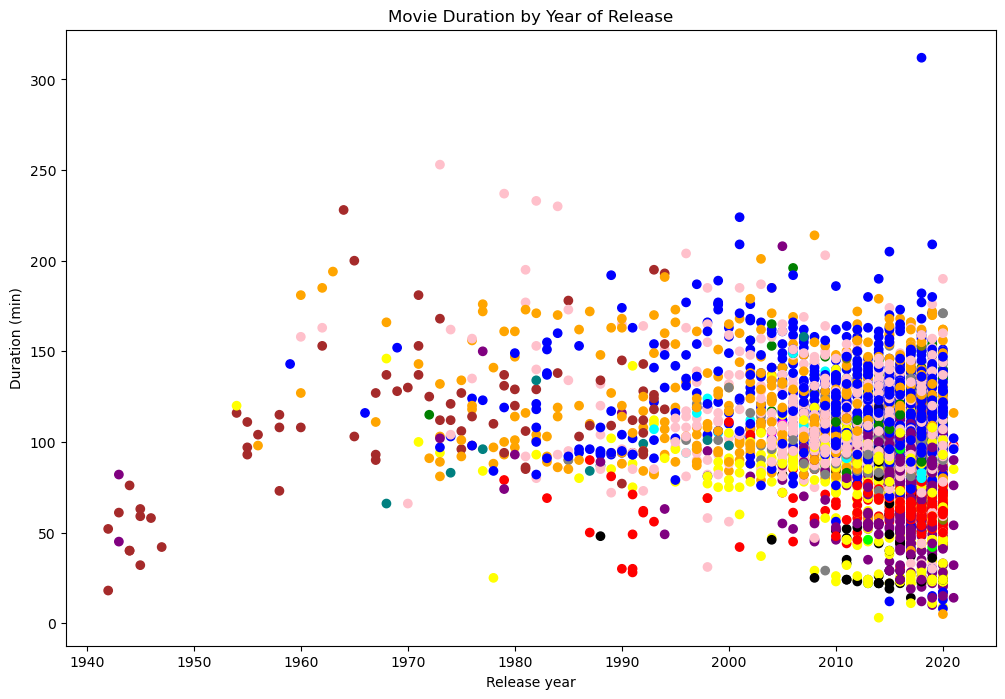

In [17]:
# Plot the movie duration by year using the genre colors created
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_movies["release_year"],netflix_movies["duration"],c=colors)
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title("Movie Duration by Year of Release")
plt.show(fig)

#### Note: For better plotting you can plot each one of them in a single plot

#### Line plot of the average movie duration for each year would be a good way to visualize this trend 

In [18]:
average_duration_by_year = netflix_movies.groupby("release_year")["duration"].mean()

In [19]:
average_duration_by_year

release_year
1942    35.000000
1943    62.666667
1944    52.000000
1945    51.333333
1946    58.000000
          ...    
2017    94.836022
2018    96.170300
2019    93.457045
2020    89.795620
2021    80.166667
Name: duration, Length: 72, dtype: float64

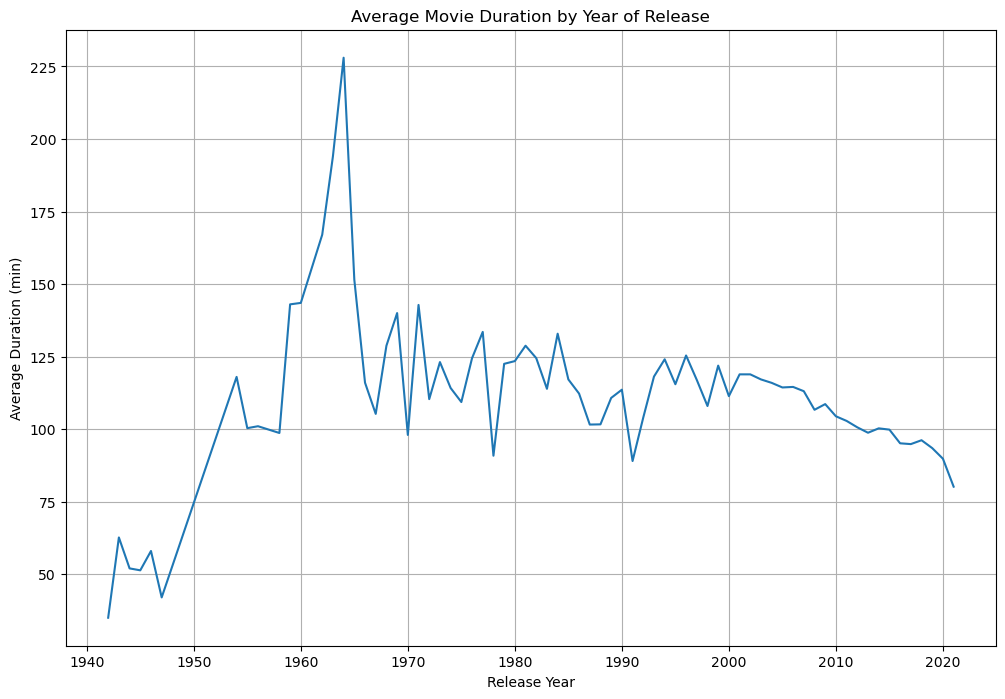

In [20]:
# Plot average movie duration over time
plt.figure(figsize=(12, 8))
plt.plot(average_duration_by_year.index, average_duration_by_year.values)
plt.xlabel("Release Year")
plt.ylabel("Average Duration (min)")
plt.title("Average Movie Duration by Year of Release")
plt.grid(True)
plt.show()